<a href="https://colab.research.google.com/github/hcantekin/Environmental-Economics/blob/main/easterisland.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina' 
from scipy.integrate import odeint
from sympy import *

## The "Hunter-Gatherer" model

As in the paper by Brander and Taylor, in the Hunter-gatherer model we specify the evolution of human population and the renewable resources as follows: $$ s_{t+1} - s_t = r(1-\frac{s_t}{s_{max}})s_t-\beta \alpha l_t \times s_t \\ l_{t+1} - l_{t} = b l_t + \phi \beta \alpha l_ts_t -\delta l_t$$. The variables are defined as follows:

s: Stock of the resource  
$s_{max}$: carrying capacity of the renewable resource  
l: size of population  
r: growth parameter of resource  
$\beta$: share of labour force employed in harvesting  
$\alpha$: harvest technology  
b: birth parameter for population
$\phi$: fertility response to changes in harvesting efficiency
$\delta$: death parameter for population

**TASK 1: Explain the two difference equations above intuitively and with link to the Easter Island Paper by Brander and Taylor.**

**TASK 2: Explain the main aspects of Figure 1 from Brander & Taylor (1998) AER paper 'The Simple Model of Easter Island'**

**TASK 3: Can you think of other examples where this set-up would be applicable? Explain**

### Draw xphase plot

We can analyse the dynamic properties of the model. This is important even if we know steady state values and believe these are adequate, as it might be, that resource levels on its way to the equilibrium become dangerously small and a little shock would mean that a resource may get extinct. Based on the set of difference equations above, we can draw a phase-space plot which can show us the evolution of both the human population and the resource specie over time. 

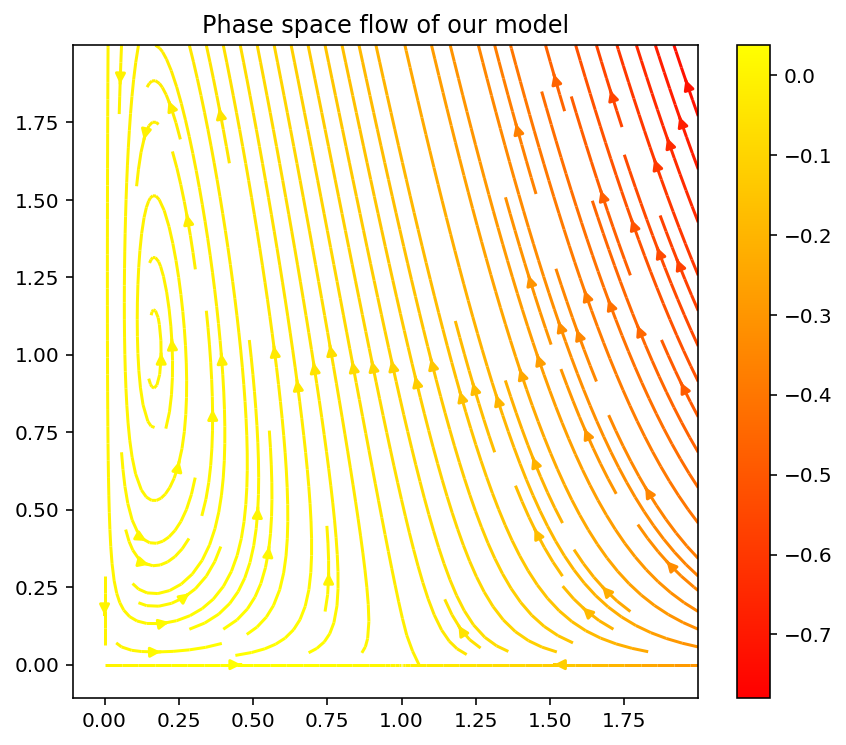

In [ ]:
n = 200
s0 = 0.5
l0 = 0.5
r = 0.15
s_max = 1
beta = 0.3
alpha = 0.4
b = 0.3
delta = 0.4
phi = 5

s, l = np.meshgrid(np.arange(0,2,0.001), np.arange(0, 2, 0.001))  # create a grid


dsdt =  r * (1-s/s_max)*s - alpha*beta*l*s
dldt =  l * (b - delta + phi*alpha*beta*s)

fig = plt.figure(figsize=(7,6))
plt.streamplot(s, l , dsdt, dldt, density=[1.2,1.2], color=dsdt, cmap='autumn')
plt.colorbar()
plt.title('Phase space flow of our model')
plt.show()

### Dynamic Simulation of Time Paths

Another way to look at the dynamics is to plot the evolution of time. We use the following equations:

$$ s_{t+1} = s_t + r(1-\frac{s_t}{s_{max}})s_t-\beta \alpha l_t \times s_t \\ l_{t+1} = l_t + b l_t + \phi \beta \alpha l_ts_t -\delta l_t$$

In [ ]:
# initialise paratermers
n = 200
s0 = 1
l0 = 0.5
r = 0.15
s_max = 1
beta = 0.3
alpha = 0.4
b = 0.3
delta = 0.4
phi = 4

# set up space for storing updated result
s = [s0]
l = [l0]

# choose the time period over which we want to simulate
T = 200
for t in range(T):
    s1 = s[t]
    # we update s and l in each period based on previous period
    s.append(r * (1-s[t]/s_max)*s[t] - alpha*beta*l[t]*s[t]+s[t])
    l.append(l[t]+l[t] * (b - delta + phi*alpha*beta*s[t]))

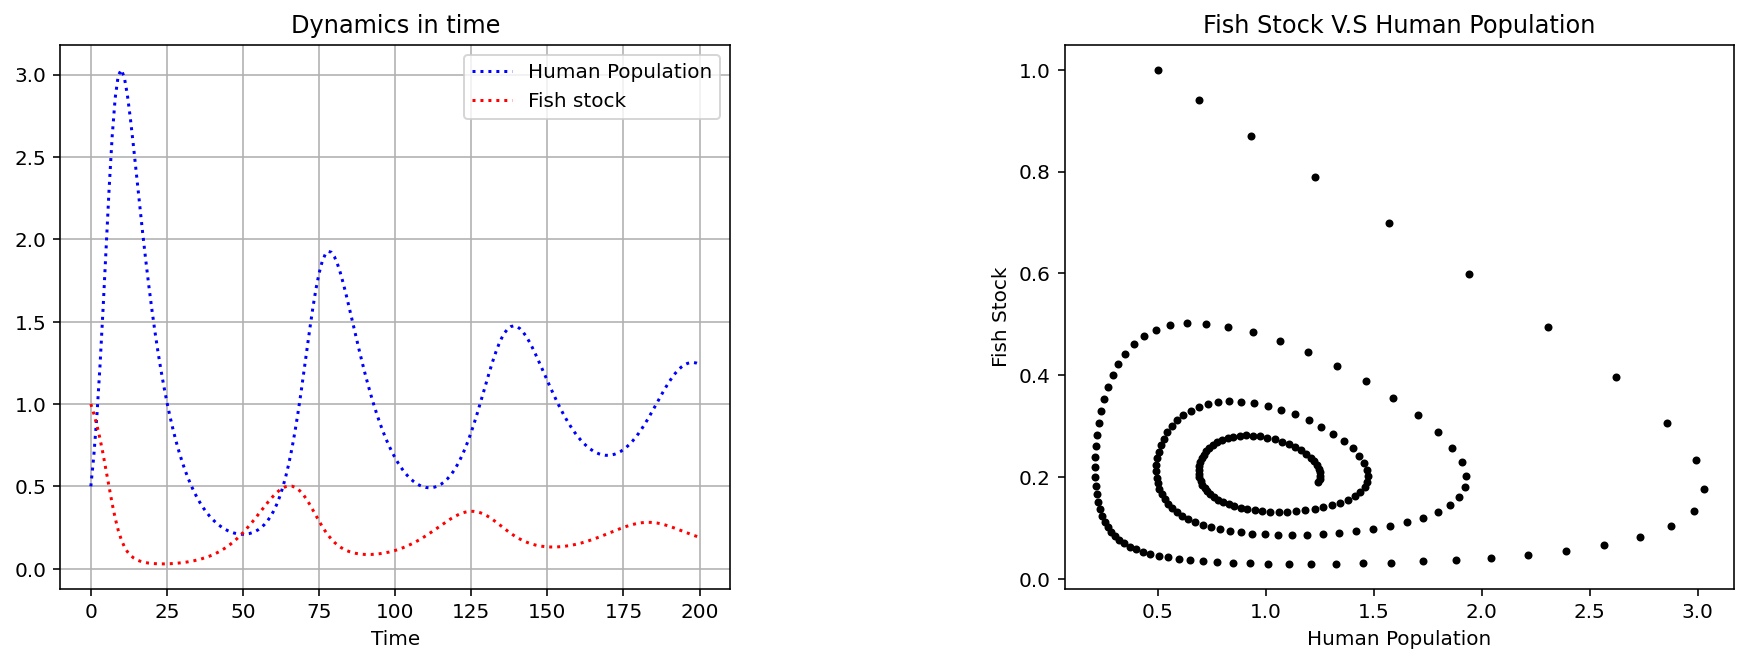

In [ ]:
# plot

fig = plt.figure(figsize=(15,5))
fig.subplots_adjust(wspace = 0.5, hspace = 0.3)

ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

ax1.plot(l, 'b:', label='Human Population')
ax1.plot(s, 'r:', label='Fish stock')
ax1.set_title('Dynamics in time')
ax1.set_xlabel('Time')
ax1.legend(loc='best')
ax1.grid()

ax2.plot(l, s, 'k.')
ax2.set_title('Fish Stock V.S Human Population')
ax2.set_xlabel('Human Population')
ax2.set_ylabel('Fish Stock')

plt.show()

**TASK4: Use the theoretical model (Figure 1 from Brander and Taylor) and the Python simulations above to think what the shock changes in the following would mean for the model:**
1. Improved fertilisers, affecting r,
2. Harvest technology, affecting α
3. Preference for harvesting the good β
4. lack of information / uncertainty
5. how to value the future / discounting


**TASK5: Think of how the model can be applied to fisheries. In particular, imagine that a consultancy has been asked to advise a government on its fishing policy because the country’s fish stocks are rapidly diminishing and it fears that the livelihoods of local fishing communities are at risk. The consultancy came across the paper by Brander and Taylor and know that it provides useful insights into sustainable living. They ask you, as an economist, to write a paragraph or two what we can learn from the paper about sustainable fisheries. Your writing should be targeted to a non-expert audience as it is to be include in the consultancy report. They also ask you to write a technical box explaining the key dynamic equations of the model formally.** 